In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

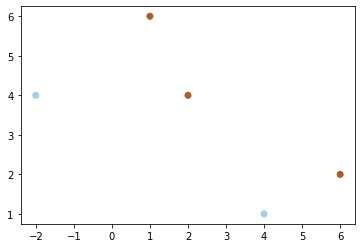

(5, 3)
(5,)


In [35]:
iris = datasets.load_iris()
# print(iris)

X = iris.data[:, :2]
y = iris.target

svc = svm.SVC(kernel='linear', C=1, gamma=.000001).fit(X, y)
#
# plt.figure()
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# plt.show()

X = np.array([[-2, 4], [4, 1], [1, 6], [2, 4], [6, 2]])
bias = np.array([[-1 for i in range(X.shape[0])]])
X = np.append(X, bias.T, axis=1)
y = np.array([-1, -1, 1, 1, 1])

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

print(X.shape)
print(y.shape)

In [39]:
print(type(y))
print(type(y[0]))
print(type(X))
print(type(X[0]))
print(type(X[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>


In [37]:
print(type(y))

<class 'numpy.ndarray'>


In [2]:
# приспособить рисовалку к вышенаписанному коду
import numpy as np
import matplotlib.pyplot as plt
import pygame as pg
import keyboard as kb

data = np.empty((0,3), dtype='f')
colorChosen = False
colors = []

def createData(position, color):
    (x, y) = position 
    r = np.random.uniform(0, 30)
    phi = np.random.uniform(0, 2*np.pi)
    coord = [x + r*np.cos(phi), y + r*np.sin(phi), color]
    global data
    data = np.append(data, [coord], axis=0)
    
       
radius = 2
thickness = 0

colors = {pg.K_1:(243, 34, 246),
          pg.K_2:(0, 191, 255),
          pg.K_3: (191, 0, 255)}
color = colors[pg.K_1]

bbb = (255,255,255)
(width, height) = (650, 480)
screen = pg.display.set_mode((width, height))
pg.display.set_caption("DataGenerator")

running = True
pushing = False

while running: 
    
    for event in pg.event.get(): 
        if event.type == pg.QUIT:
            running = False              
        elif event.type == pg.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pg.MOUSEBUTTONUP:
            pushing = False
        elif event.type == pg.KEYDOWN and event.key in colors:
            color = colors[event.key]

    if pushing and np.random.uniform(0, 1) > 0.9:
        createData(pg.mouse.get_pos(), color)
            
    screen.fill(bbb)
    for point in data:
        pg.draw.circle(screen, point[2], (int(point[0]), int(point[1])), radius, thickness)
        
    pg.display.flip()
    
pg.quit()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [3]:
data

array([[121.4019974851832, 103.04208168627089, (243, 34, 246)],
       [110.11008633668033, 66.86181906788468, (243, 34, 246)],
       [113.78235284543997, 86.12942764059136, (243, 34, 246)],
       [96.25776188891484, 72.45879767949172, (243, 34, 246)],
       [117.69833276029757, 74.29112041210767, (243, 34, 246)],
       [103.45469457004617, 108.15224196513402, (243, 34, 246)],
       [119.21987607697066, 110.91666793943881, (243, 34, 246)],
       [111.43731609219165, 104.32780508992634, (243, 34, 246)],
       [122.05190125188219, 110.53258527918629, (243, 34, 246)],
       [104.20442545722335, 120.71085677167936, (243, 34, 246)],
       [111.0454687957245, 126.764669900977, (243, 34, 246)],
       [95.65334568365172, 140.96555700171064, (243, 34, 246)],
       [121.89648891485638, 132.61451603061286, (243, 34, 246)],
       [101.56643190563481, 162.64626928713744, (243, 34, 246)],
       [130.61042449761777, 133.4162592737178, (243, 34, 246)],
       [127.89287293904428, 129.0923

In [4]:
import pandas as pd
df = pd.DataFrame(columns = ['x', 'y', 'rgb'])
df

for i in range(len(data)):
    df.loc[i, 'x'] = round(data[i][0])
    df.loc[i, 'y'] = round(data[i][1])
    if (data[i][2][0] == 0):
        df.loc[i, 'rgb'] = 1
    else:
        df.loc[i, 'rgb'] = 0

df

,x,y,rgb


In [14]:
print(type(df['x'][0]))
df['x'] = df['x'].astype(np.int32)
print(type(df['x'][0]))
df['y'] = df['y'].astype(np.int32)

<class 'numpy.int32'>
<class 'numpy.int32'>


In [15]:
from sklearn.utils import shuffle

def svm_sgd(X, y):
    w = np.zeros(len(X[0]))
    h = 1
    epochs = 10000

    for epoch in range(1, epochs):
        h = 1/epoch
        X_, y_ = shuffle(X, y)
        for i, x in enumerate(X):
            distance = 1 - y_[i]*np.dot(X_[i], w)
            if max(0, distance) == 0:
                w[:-1] -= h*(w[:-1])/ len(X_) 
            else:
                w[:-1] -= h*(w[:-1])- X_[i][:-1]*y_[i]/ len(X_)
                w[-1] = h*y_[i]
        return w

x = df.to_numpy()
y = df['rgb'].to_numpy()
    

In [16]:
w = svm_sgd(x, y)
print(w)

y_test = np.sign(np.dot(x, w))

plt.plot([0, w[-1]/w[0]], [w[-1]/w[1], 0], marker='s')
plt.scatter(x[:, 0], x[:, 1], c='r', cmap=plt.cm.Paired)
# plt.scatter(X_test[:,0], X_test[:,1], c=[d1[y] for y in y_pred])
plt.show()

# максимально широкий коридор

TypeError: ufunc 'subtract' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''